# Блок №7 Минипроект

Настало время последнего мини-проекта в блоке Python! В нём вы поработаете с API и узнаете, как ведут себя пользователи на сайте Яндекс.Метрики.

Так как мы работаем с демо данными Яндекс.Метрики, нам позволено видеть данные только за последнюю неделю. Это требует обновления заданий и ответов на них каждую неделю, что не очень удобно и вам, и нам. Поэтому для удобства проверки мы решили немного модифицировать степы: теперь для того, чтобы ответить на вопросы, вам необходимо поработать с уже выгруженными датасетами из Яндекс.Метрики. Но вы можете самостоятельно повторить каждый из запросов в задании к реальному API Яндекс.Метрики, чтобы потренироваться и получить данные в таком же формате, как в прикрепленном к задаче датасете.

In [1]:
import pandas as pd
import requests
import json
from io import BytesIO


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(
    font_scale =2,
    style      ='whitegrid',
    rc         ={'figure.figsize': (20,7)}
)

# Задание 1
___
Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся [здесь](https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv).

In [2]:
url_1 = 'https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv'

In [3]:
df_1 = pd.read_csv(url_1, parse_dates=['date'])
df_1

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [4]:
df_1.dtypes

date         datetime64[ns]
user_type            object
visits              float64
dtype: object

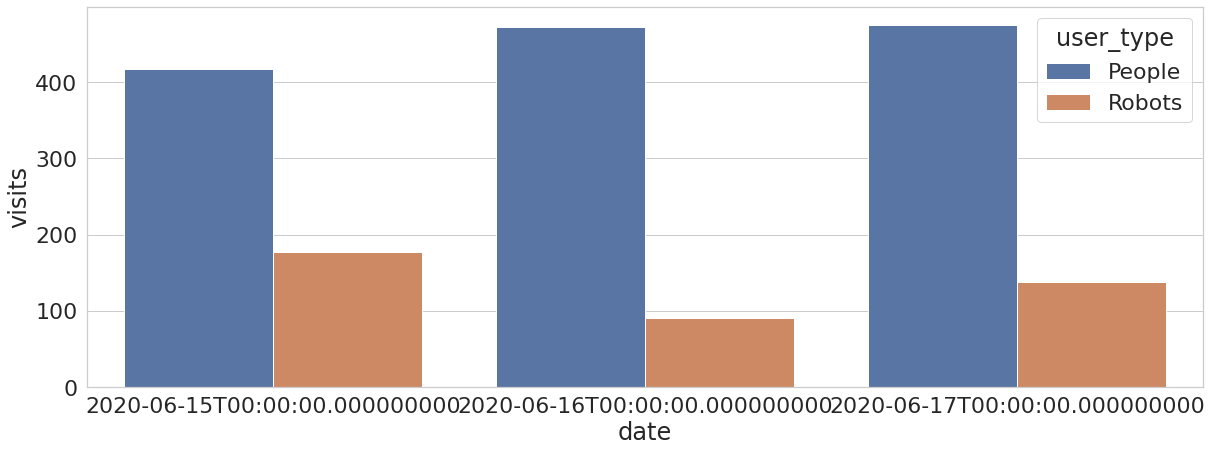

In [5]:
sns.barplot(x='date', y='visits', hue='user_type', data=df_1);

Ответ:
+ Наименьшее число посещений пользователей-людей наблюдается 15 июня
+ Наибольшая разница между числом посещений людьми и ботами наблюдается 16 июня
+ 15 июня сайт посетило наибольшее число ботов
+ 15 июня ботов было примерно в два раза больше, чем 16 июня

In [7]:
# Пример обращения к Яндекс.метрике
# dates = ['2022-01-03', '2022-01-04', '2022-01-05']
# url = 'https://api-metrika.yandex.net/analytics/v3/data/ga?'

# df = pd.DataFrame()

# for date in dates:
#     visits = f"end-date={date}&ids=ga%3A29761725&metrics=ga%3Apageviews&start-date={date}"
#     response = requests.get(url + visits)
    
#     json_data = response.json()
#     break

# Задание 2
___
Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат [здесь](https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv).

In [8]:
url_2 = 'https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv'

In [9]:
# Считывание данных
df_2 = pd.read_csv(url_2)

In [10]:
df_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [13]:
# Посчитаем количество посещений для каждого браузера
visits_vs_browser = df_2.groupby('browser') \
                                    .agg({'visits': 'sum'})

In [14]:
visits_vs_browser

,visits
browser,
Android Browser,1.0
Chrome Mobile,31.0
Chromium,2.0
CocCoc,1.0
Edge,5.0
Firefox,58.0
Google Chrome,354.0
Mobile Safari,16.0
Opera,16.0


In [15]:
visits_vs_browser.loc['Google Chrome'] \
                    .div(visits_vs_browser.sum()) \
                    .mul(100) \
                    .round()

visits    60.0
dtype: float64

In [16]:
# Еще один способ получить нужный результат
round(100 * (df_2[df_2.browser == 'Google Chrome'].visits.sum() / df_2.visits.sum()), 0)

60.0

# Задание 3
___
Давайте выясним, с какого браузера приходит БОЛЬШЕ всего ботов. Посмотрите на [данные](https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv) и определите, у какого браузера самая БОЛЬШАЯ доля посещений сайта ботами от общего числа посещений?

В качестве ответа укажите название браузера.

In [17]:
url_3 = 'https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv'

In [18]:
df_3 = pd.read_csv(url_3)

In [19]:
df_3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [22]:
# Посчитаем количество всех посещений для каждого браузера
visits_vs_browser = df_3.groupby('browser', as_index=False) \
                                    .agg({'visits': 'sum'})

In [23]:
visits_vs_browser.head()

,browser,visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0


In [24]:
# Обеденим данные
full_df_3 = df_3.merge(visits_vs_browser, 
                       on='browser', 
                       suffixes=('_type', '_all'))
full_df_3.head()

,date,browser,user_type,visits_type,visits_all
0,2020-06-15,Google Chrome,People,250.0,354.0
1,2020-06-15,Google Chrome,Robots,104.0,354.0
2,2020-06-15,Yandex Browser,People,47.0,54.0
3,2020-06-15,Yandex Browser,Robots,7.0,54.0
4,2020-06-15,Firefox,Robots,31.0,58.0


In [25]:
# Посчитаем для каждого браузера процент посещения от общего числа посещений
full_df_3['ration'] = full_df_3.visits_type / full_df_3.visits_all
full_df_3.head()

,date,browser,user_type,visits_type,visits_all,ration
0,2020-06-15,Google Chrome,People,250.0,354.0,0.706215
1,2020-06-15,Google Chrome,Robots,104.0,354.0,0.293785
2,2020-06-15,Yandex Browser,People,47.0,54.0,0.870370
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,0.129630
4,2020-06-15,Firefox,Robots,31.0,58.0,0.534483


In [31]:
# Отберем необходимые данные для ответа
full_df_3.query('user_type == "Robots"') \
                        .nlargest(1, columns='ration') \
#                         .browser

,date,browser,user_type,visits_type,visits_all,ration
15,2020-06-15,UCWEB,Robots,4.0,4.0,1.0


In [32]:
# Дополнительный способ решения задачи
# df_3.groupby(['browser', 'user_type'], as_index=False) \
#     .agg({'visits': 'sum'}) \
#     .pivot(index='browser', columns='user_type', values='visits') \
#     .reset_index() \
#     .fillna(0) \
#     .assign(percent=lambda x: x['Robots'] / (x['Robots'] + x['People'])) \
#     .sort_values('percent', ascending=False) \
#     .nlargest(1, columns='percent')

# Задание 4
___
Выгрузите [данные](https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv), содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [33]:
url_4 = 'https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv'

In [34]:
df_4 = pd.read_csv(url_4)
df_4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [37]:
# Проверим наличие дубликатов
df_4.duplicated(['date', 'browser', 'user_type']).sum()
# сочетание трех полей для каждой строчки уникально
# значит группировка не нужна

0

In [36]:
# Создадим колонку с процентом посещений от общего числа посещений
df_4['percent'] = df_4.visits.div(df_4.visits.sum()).mul(100)

In [25]:
# Найдем ответ на задачу
df_4.query('user_type == "People" and browser == "Safari"').percent.round(1)

7    3.2
Name: percent, dtype: float64

# Задание 5
___
При помощи библиотеки `gspread` отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи vk api себе в личку ВКонтакте. 

In [38]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [39]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'stamatin192@gmail.com'
path_to_credenrials = '/home/jupyter-a.stamati-16/Lectures_7/project-lesson-7-337412-c33f55c76e70.json'

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credenrials, scope)
gs = gspread.authorize(credentials)

In [40]:
gs

In [38]:
table_name = 'score_test'

In [39]:
gs.create(table_name)

<Spreadsheet 'score_test' id:1YDsRgCZ2o9Jzlcn9OwxInvVWakLYzlMH0ifTPUZFJYU>

In [40]:
table = gs.open(table_name)

In [41]:
table

<Spreadsheet 'score_test' id:1YDsRgCZ2o9Jzlcn9OwxInvVWakLYzlMH0ifTPUZFJYU>

In [42]:
table.share(my_mail, perm_type='user', role='writer')

In [43]:
sheet_name = 'list1'

In [44]:
# индексы должны быть уникальны
df_4.reset_index(drop=True, inplace=True)
df_4

,date,browser,user_type,visits,percent
0,2020-06-15,Google Chrome,People,250.0,42.087542
1,2020-06-15,Google Chrome,Robots,104.0,17.508418
2,2020-06-15,Yandex Browser,People,47.0,7.912458
3,2020-06-15,Firefox,Robots,31.0,5.218855
4,2020-06-15,Chrome Mobile,People,31.0,5.218855
5,2020-06-15,Firefox,People,27.0,4.545455
6,2020-06-15,Safari,Robots,22.0,3.703704
7,2020-06-15,Safari,People,19.0,3.198653
8,2020-06-15,Mobile Safari,People,15.0,2.525253
9,2020-06-15,Opera,People,11.0,1.851852


In [45]:
d2g.upload(df_4, 
           table_name, 
           sheet_name, 
           credentials=credentials, 
           row_names=True)

<Worksheet 'list1' id:681329700>

___

In [57]:
import vk_api
import numpy as np

In [48]:
with open('/home/jupyter-a.stamati-16/Lectures_7/vk_token.txt') as src:
    vk_token = src.readline()

In [51]:
chat_id = 1

In [53]:
# создаем сессию в ВК
vk_session = vk_api.VkApi(token=vk_token)

In [54]:
# позволяет обращаться к методам библиотеки
vk = vk_session.get_api()

In [59]:
link = 'https://docs.google.com/spreadsheets/d/1YDsRgCZ2o9Jzlcn9OwxInvVWakLYzlMH0ifTPUZFJYU/edit?usp=sharing'

In [68]:
vk.messages.send(
    chat_id=chat_id,
    random_id=np.random.randint(0, 2 ** 31),
    message=link)

0

In [79]:
# отправка документов в ВК
my_id = 142769948

path = '/home/jupyter-an.karpov/lesson_7/step_1_lesson_7.csv'
file_name = 'top_ctr_data.csv'

upload_url = vk.docs.getMessagesUploadServer(peer_id=my_id)["upload_url"]

with open(path, 'rb') as f:
    file = {'file': (file_name, f)}

    response = requests.post(upload_url, files=file)

PermissionError: [Errno 13] Permission denied: '/home/jupyter-an.karpov/lesson_7/step_1_lesson_7.csv'

In [75]:
json_data = json.loads(response.text)
saved_file = vk.docs.save(file=json_data['file'], title=file_name)
attachment = 'doc{}_{}'.format(saved_file['doc']['owner_id'], saved_file['doc']['id'])

KeyError: 'file'

In [ ]:
vk.messages.send(
    chat_id=1,
    random_id=np.random.randint(0, 2 ** 31),
    message='Топ объявлений по CTR', 
    attachment = attachment
)

# Задание 6
___
Другой аналитик уже агрегировал часть данных из метрики, и вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение `visits` к `users`) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

Вот так можно прочитать данные другого аналитика:
```
from io import BytesIO
import requests


r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))
```

In [43]:
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df_5 = pd.read_csv(BytesIO(data))

In [44]:
df_5.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [48]:
# Объеденим данные
full_data = df_3.merge(df_5, on=['date', 'browser', 'user_type'])

In [49]:
# Посчитаем отношение
full_data['ration'] = full_data.visits / full_data.users

In [50]:
# Найдем ответ на задачу
full_data.query('browser == "Google Chrome" and user_type == "Robots"')

,date,browser,user_type,visits,users,ration
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
